## Library yang akan digunakan

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memanggil dataset

In [35]:
df = pd.read_csv('Mcdonalds.csv')

## 1. BUSINESS UNDERSTANDING

1. Problem 

McDonald di India memiliki berbagai macam size menu dan jumlah kalori yang berbeda-beda. Dengan tercantumnya komposisi di setiap menu Mcdonlads, apakah ukuran makanan ini dapat mempengaruhi asupan gizi seperti energi, kolesterol, protein dan gula yang akan di butuhkan dan serap oleh tubuh para pelanggan agar tidak berlebihan dalam mengkonsumsi nya.

2. Tujuan

Dataset yang di ambil dari kaggle ini (https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts) bertujuan untuk menganalisis dan mengetahui estimasi jumlah kalori dari ukuran menu McDonalds dan agar pelanggan dapat lebih sadar akan apa yang mereka makan tanpa perlu khawatir dapat menyebabkan penyakit kronis.

## 2. DATA UNDERSTANDING

Dari pengumpulan data yang telah diambil mengenai Menu nutrisi McDonalds India, terdapat 8 kolom yang berisi 3 kolom objek dan 6 kolom float. Jika menggunakan regresi linear, maka hanya kolom yang berisi float saja yang bisa diolah. Berikut atribut-atribut nya :

0. Menu Categeory (Golongan) = objek
1. Menu Items (Nama-nama menu) = objek
2. Serve_Size  = objek
3. Calories (Kalori) = float
4. Protein (Protein) = float
5. Total_fat (Total Lemak) = float
6. Cholesterol (Kolestrol) = float        
7. Total_Carbohydrate (Total karbohidrat) = float
8. Total_Sugars (Gula) = float

## Deskripsi dataset

In [36]:
df.head()

,Menu Category,Menu Items,Serve_Size,Calories,Protein,Total_fat,Cholesterols,Total_carbohydrate,Total_Sugars
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,2.49,56.54,7.90
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,1.47,50.27,7.05
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,21.85,52.33,8.35
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,40.93,59.27,3.50
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,25.24,56.96,7.85


# DATA PREPARATION

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Menu Category       141 non-null    object 
 1   Menu Items          141 non-null    object 
 2   Serve_Size          141 non-null    object 
 3   Calories            141 non-null    float64
 4   Protein             141 non-null    float64
 5   Total_fat           141 non-null    float64
 6   Cholesterols        141 non-null    float64
 7   Total_carbohydrate  141 non-null    float64
 8   Total_Sugars        141 non-null    float64
dtypes: float64(6), object(3)
memory usage: 10.0+ KB


## Mencari heatmap

<AxesSubplot:>

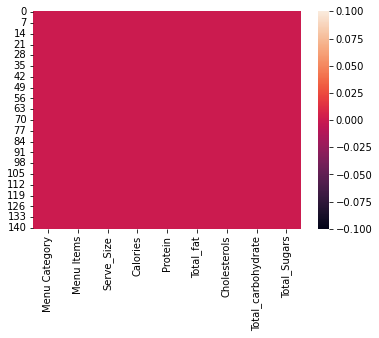

In [38]:
sns.heatmap(df.isnull())

## Melihat Nilai Data

In [39]:
df.describe()

,Calories,Protein,Total_fat,Cholesterols,Total_carbohydrate,Total_Sugars
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,244.635461,7.493546,9.991702,26.350071,31.190284,15.464894
std,185.554837,8.336863,10.339511,50.334200,20.602044,15.690202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,1.510000,15.740000,2.330000
50%,219.360000,4.790000,7.770000,8.390000,30.820000,9.160000
75%,339.520000,10.880000,14.160000,31.110000,46.000000,26.950000
max,834.360000,39.470000,45.180000,302.610000,93.840000,64.220000


## Visualisasi Data

<AxesSubplot:>

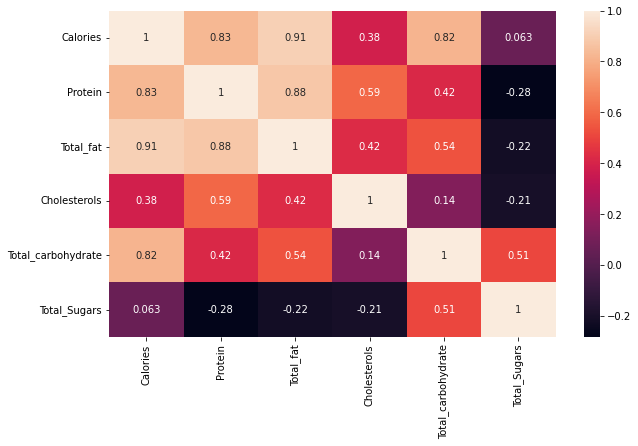

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

## Jumlah Kalori Berdasarkan Size Menu

In [43]:
brands = df.groupby('Serve_Size').count()[['Cholesterols']].sort_values(by='Cholesterols', ascending=True).reset_index()
brands = brands.rename(columns={'Cholesterols':'Calories'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106]),
 [Text(0, 0, '10 g'),
  Text(1, 0, '306 g'),
  Text(2, 0, '301 g'),
  Text(3, 0, '30 g'),
  Text(4, 0, '297.5 ml'),
  Text(5, 0, '296.5 ml'),
  Text(6, 0, '296 g'),
  Text(7, 0, '291.5 ml'),
  Text(8, 0, '290 ml'),
  Text(9, 0, '307 g'),
  Text(10, 0, '280 ml'),
  Text(11, 0, '264.5 g'),
  Text(12, 0, '26.5 ml'),
  Text(13, 0, '257 g'),
  Text(14, 0, '93.29 g'),
  Text(15, 0, '245 ml'),
 

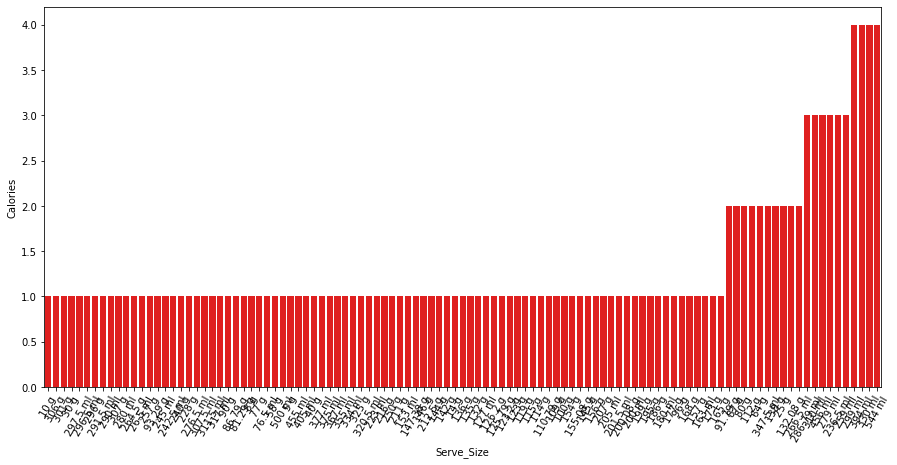

In [44]:
fig = plt.figure(figsize = (15,7))
sns.barplot(x = brands['Serve_Size'], y = brands['Calories'], color = 'red')
plt.xticks(rotation = 60)

# MODELLING DATA

## Seleksi Fitur

In [45]:
fitur = ['Total_fat', 'Protein', 'Total_carbohydrate', 'Total_Sugars', 'Cholesterols']
x = df[fitur]
y = df['Calories']
x.shape, y.shape

((141, 5), (141,))

## Split Data Training & Testing

In [46]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 70)
y_test.shape

(36,)

## membuat regresi linier

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# EVALUTION DATA

In [48]:
y = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  0.9967785137133416


## Membuat inputan regresi linier

In [51]:
#Protein (g) = 20.29, Total_fat = 22.94, Total_Carbohydrate (g) = 38.54, Total_Sugars (g) = 7.48 ,  Cholesterols (mg) = 47.63
inputan = np.array([[20.29, 22.94, 38.54, 7.48, 47.63]])
prediksi = lr.predict(inputan)
print('Estimasi Jumlah Kalori dalam size menu Mcdonalds : ', prediksi)

Estimasi Jumlah Kalori dalam size menu Mcdonalds :  [447.8688943]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

## Save Model

In [52]:
import pickle
filename = 'estimasi_mcdonalds.sav'
pickle.dump(lr,open(filename,'wb'))